In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

from scipy.spatial.distance import pdist, squareform
from scipy.spatial import distance_matrix
from itertools import permutations, combinations
from math import comb
import numpy as np
from timeit import default_timer as timer
import sys
sys.path.insert(0, '/home/kurk/curse/filtration/graph_func.cpython-312-x86_64-linux-gnu.so')

import graph_func as gf
import importlib
importlib.reload(gf)
from timeit import default_timer as timer

from sklearn.neighbors import radius_neighbors_graph
import networkx as nx


print(gf.__file__)
print(gf.filtrate.__doc__)

ModuleNotFoundError: No module named 'netlibpp_cpy'

In [ ]:
X = np.array([
    [0, 2.75], # 1
    [2, 2], # 2
    [3, 2.25], # 3
    [4, 4], #4
    [3.5, 0.75], #5
    [2.5, -0.25], #6
    [2.25, -2.25], #7
    [2.5, -4], #8
    [1, -3], #9
    [-1, -2.75], #10
    [-2.5, -1.0], #11
    [-4, 0.5], #12
    [-2, 1] #13
])

X = X + np.random.normal(0, 0.05, X.shape)
X

array([[ 0.02893073,  2.70836919],
       [ 1.97424653,  1.95276331],
       [ 3.02478317,  2.23670149],
       [ 3.95178428,  4.054343  ],
       [ 3.47266793,  0.7641081 ],
       [ 2.47493273, -0.21742175],
       [ 2.21141899, -2.22472595],
       [ 2.48033112, -4.0715355 ],
       [ 0.97710564, -2.96429387],
       [-1.01903639, -2.78857029],
       [-2.50191867, -1.04138256],
       [-4.03348649,  0.61019318],
       [-2.0172625 ,  1.03601694]])

In [ ]:
A = radius_neighbors_graph(X, 4.25, mode='distance', include_self=False).toarray() #.astype(int)
G = nx.from_numpy_array(A)
A

array([[0.        , 2.08691011, 3.0327549 , 4.14733957, 3.95467787,
        3.81355195, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 2.6426632 ],
       [2.08691011, 0.        , 1.08823165, 2.88570489, 1.91263376,
        2.22719327, 4.18421646, 0.        , 0.        , 0.        ,
        0.        , 0.        , 4.09543261],
       [3.0327549 , 1.08823165, 0.        , 2.04038028, 1.53919851,
        2.51496648, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [4.14733957, 2.88570489, 2.04038028, 0.        , 3.32493581,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [3.95467787, 1.91263376, 1.53919851, 3.32493581, 0.        ,
        1.39959864, 3.24405269, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [3.81355195, 2.22719327, 2.51496648, 0.        , 1.39959864,
        0.        , 2.02452

In [ ]:
_A = distance_matrix(X, X)
dm = gf.get_VR_from_dist_matrix(_A, 0, 3)
# dm.creat(A, 3)
# dm.as_list()
_A

13 13


array([[0.        , 2.08691011, 3.0327549 , 4.14733957, 3.95467787,
        3.81355195, 5.39431949, 7.20947096, 5.75136   , 5.59594306,
        4.52391831, 4.57226161, 2.6426632 ],
       [2.08691011, 0.        , 1.08823165, 2.88570489, 1.91263376,
        2.22719327, 4.18421646, 6.04551882, 5.01714473, 5.60713715,
        5.38525435, 6.15591996, 4.09543261],
       [3.0327549 , 1.08823165, 0.        , 2.04038028, 1.53919851,
        2.51496648, 4.53496374, 6.33168871, 5.58957386, 6.45025837,
        6.42575041, 7.24325202, 5.18303656],
       [4.14733957, 2.88570489, 2.04038028, 0.        , 3.32493581,
        4.51985227, 6.51579452, 8.25803098, 7.62298999, 8.45780825,
        8.22293748, 8.6963623 , 6.68878253],
       [3.95467787, 1.91263376, 1.53919851, 3.32493581, 0.        ,
        1.39959864, 3.24405269, 4.93641381, 4.4865145 , 5.72686052,
        6.24143265, 7.50773227, 5.49665994],
       [3.81355195, 2.22719327, 2.51496648, 4.51985227, 1.39959864,
        0.        , 2.02452

In [ ]:
def plot_core(G, K):

    def stack(idx):
        ret = np.empty((0, 2))
        for _id in idx:
            ret = np.vstack((ret, X[_id,:]))
        return ret

    max_dim_K = len(K)

    plt.figure(figsize=(17,4))

    plt.subplot(1, 4, 1)
    plt.xlim((-5, 5))
    plt.ylim((-5, 5))
    plt.grid(linestyle="dotted")
    plt.title("Neighborhood graph$")

    # plot vertices
    plt.scatter(X[:,0], X[:,1])

    for i in range(len(X)):
        plt.annotate(str(i), (X[i][0], X[i][1]))

    # plot edges
    for e in G.edges():
        (start_id, end_id) = e
        plt.plot([X[start_id,0], X[end_id,0]], [X[start_id,1], X[end_id,1]], 'c-', alpha=0.5)

    plt.subplot(1, 4, 3)
    plt.xlim((-5, 5))
    plt.ylim((-5, 5))
    plt.grid(linestyle="dotted")
    plt.title("Vietoris-Rips complex$")

    # plot vertices
    plt.scatter(X[:,0], X[:,1])

    # plot edges
    for e in G.edges():
        (start_id, end_id) = e
        plt.plot([X[start_id,0], X[end_id,0]], [X[start_id,1], X[end_id,1]], 'c-', alpha=0.5)

    # plot triangles
    if max_dim_K >= 3:
        for triangle in K[2]:
            t = plt.Polygon(stack(triangle), color="blue", alpha=0.15)
            plt.gca().add_patch(t)

    # plot tetrahedrons
    if max_dim_K >= 4:
        for tetra in K[3]:
            tt = plt.Polygon(stack(tetra), color="red", alpha=0.15)
            plt.gca().add_patch(tt)

    plt.show()

In [ ]:
epsilons = list(np.sort(A[np.tril(A).nonzero()]))
epsilons

[1.0882316486220938,
 1.399598642176595,
 1.438919781084008,
 1.539198506383384,
 1.8662848733460689,
 1.8669951493765948,
 1.912633757767127,
 2.0038617129200476,
 2.0245270227054744,
 2.040380284343002,
 2.060700130808234,
 2.0869101127525833,
 2.1331854805278185,
 2.227193273894808,
 2.2524214488970693,
 2.2916380249237664,
 2.514966475747721,
 2.6426632013769544,
 2.8857048911126575,
 3.0327549009474652,
 3.128704592862421,
 3.244052694985076,
 3.279292966646792,
 3.324935811347059,
 3.7271400155051015,
 3.8135519455428115,
 3.8541175295224557,
 3.9527108286562416,
 3.9546778731695094,
 3.97507208019877,
 4.095432614167171,
 4.1473395684195165,
 4.184216456677632]

13 13


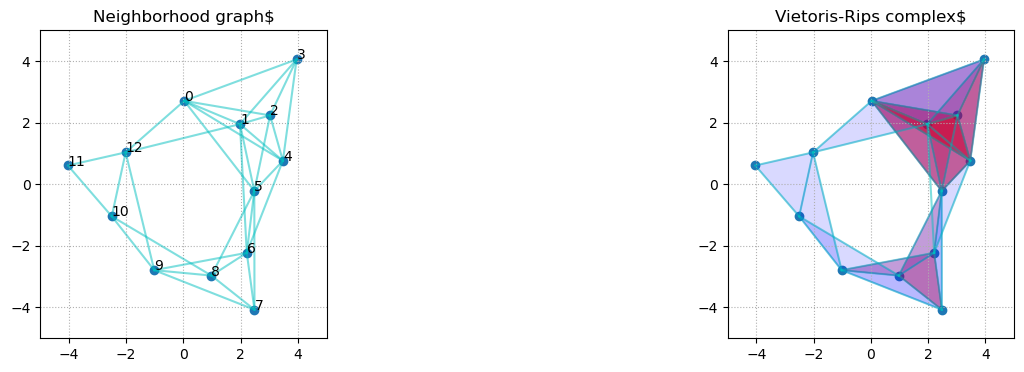

2


array([[0.        , 2.08691011, 3.0327549 , 4.14733957, 3.95467787,
        3.81355195, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 2.6426632 ],
       [2.08691011, 0.        , 1.08823165, 2.88570489, 1.91263376,
        2.22719327, 4.18421646, 0.        , 0.        , 0.        ,
        0.        , 0.        , 4.09543261],
       [3.0327549 , 1.08823165, 0.        , 2.04038028, 1.53919851,
        2.51496648, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [4.14733957, 2.88570489, 2.04038028, 0.        , 3.32493581,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [3.95467787, 1.91263376, 1.53919851, 3.32493581, 0.        ,
        1.39959864, 3.24405269, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [3.81355195, 2.22719327, 2.51496648, 0.        , 1.39959864,
        0.        , 2.02452

In [ ]:
_A = radius_neighbors_graph(X, epsilons[len(epsilons) - 1], mode='distance', include_self=False).toarray()
__A = distance_matrix(X, X)
__K = gf.get_VR_from_dist_matrix(__A, epsilons[len(epsilons) - 1], 4)
_K =  __K.as_list()
plot_core(nx.from_numpy_array(_A), _K)
print(__K.filtration(2)[5].dim())
__K.volume_of(__K.filtration(1)[5])
A

In [ ]:
__K = gf.get_Lp_from_coord_matrix(X, 4.23, 2, 4)
__K.as_list()

78
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
286
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
715
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr


[[[0], [1], [2], [3], [4], [5], [6], [7], [8], [9], [10], [11], [12]],
 [[0, 1],
  [0, 2],
  [0, 3],
  [0, 4],
  [0, 5],
  [0, 12],
  [1, 2],
  [1, 3],
  [1, 4],
  [1, 5],
  [1, 6],
  [1, 12],
  [2, 3],
  [2, 4],
  [2, 5],
  [3, 4],
  [4, 5],
  [4, 6],
  [5, 6],
  [5, 7],
  [5, 8],
  [6, 7],
  [6, 8],
  [6, 9],
  [7, 8],
  [7, 9]],
 [[0, 1, 2],
  [0, 1, 3],
  [0, 1, 4],
  [0, 1, 5],
  [0, 1, 12],
  [0, 2, 3],
  [0, 2, 4],
  [0, 2, 5],
  [0, 4, 5],
  [1, 2, 3],
  [1, 2, 4],
  [1, 2, 5],
  [1, 3, 4],
  [1, 4, 5],
  [1, 4, 6],
  [1, 5, 6],
  [2, 3, 4],
  [2, 4, 5],
  [4, 5, 6],
  [5, 6, 7],
  [5, 6, 8],
  [5, 7, 8],
  [6, 8, 9],
  [6, 7, 8],
  [6, 7, 9],
  [8, 9, 10],
  [7, 8, 9],
  [9, 10, 12],
  [10, 11, 12]],
 [[0, 1, 2, 3],
  [0, 1, 2, 4],
  [0, 1, 2, 5],
  [0, 1, 4, 5],
  [0, 2, 4, 5],
  [1, 2, 3, 4],
  [1, 4, 5, 6],
  [1, 2, 4, 5],
  [5, 6, 7, 8],
  [6, 7, 8, 9]]]

Graph with 13 nodes and 1 edges
13 2


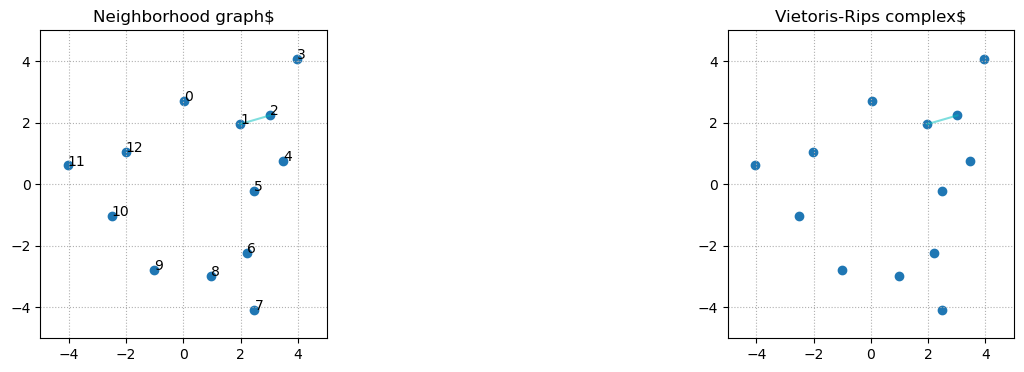

Graph with 13 nodes and 1 edges
13 2


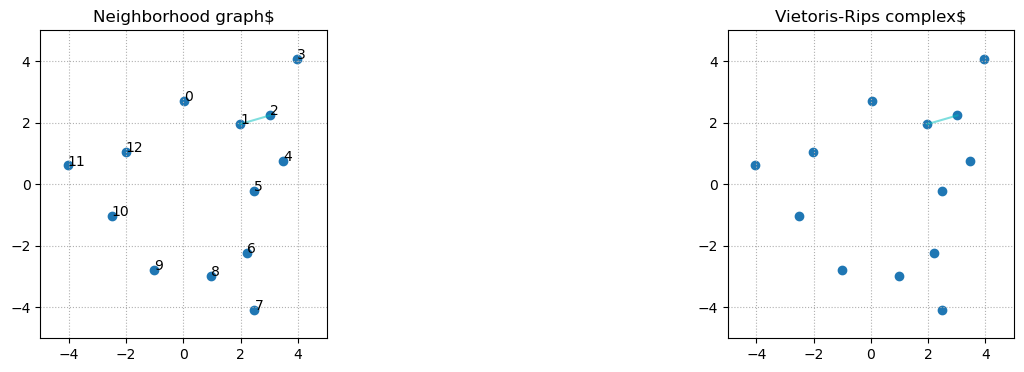

Graph with 13 nodes and 3 edges
13 2


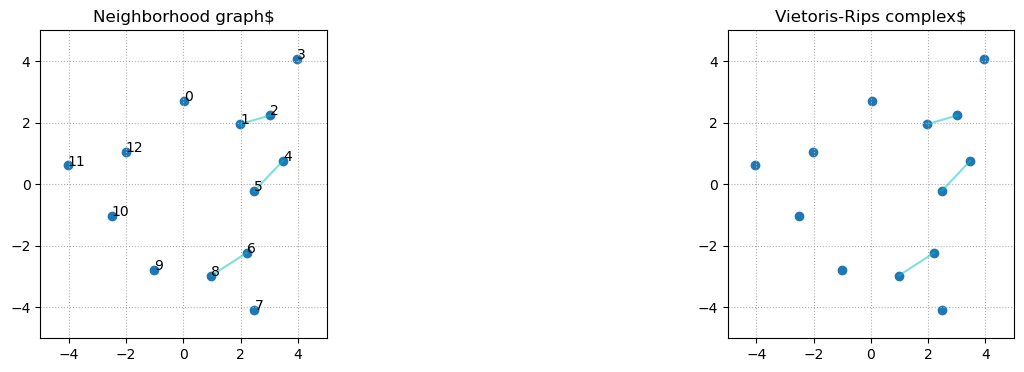

Graph with 13 nodes and 4 edges
13 2


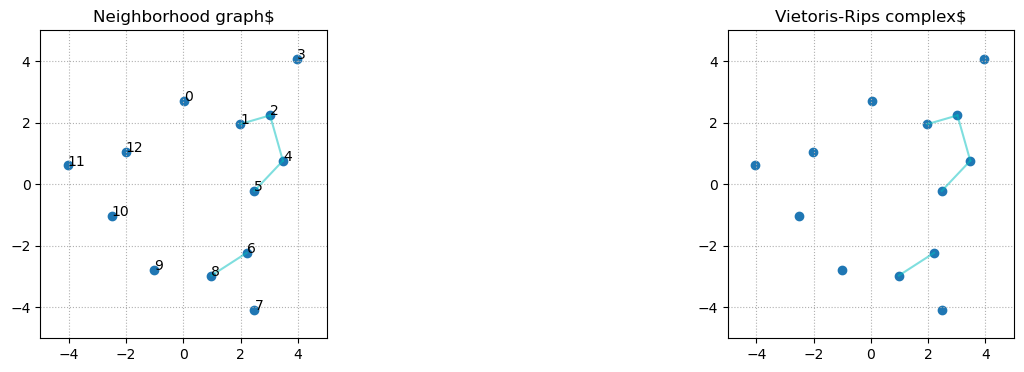

Graph with 13 nodes and 4 edges
13 2


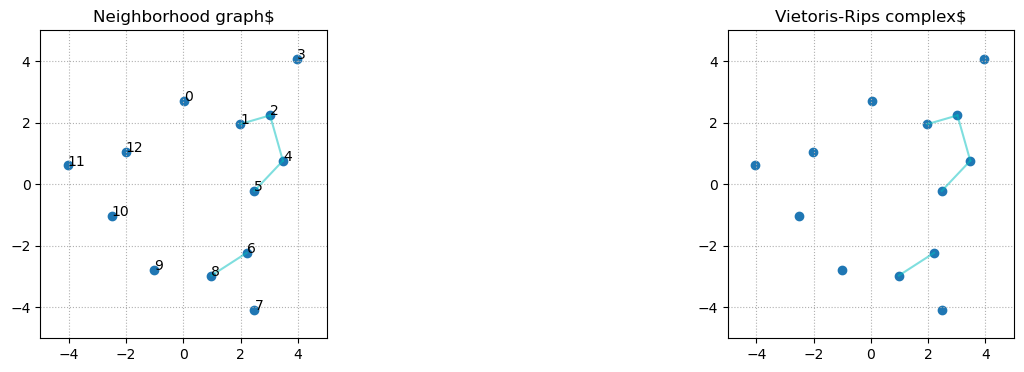

Graph with 13 nodes and 6 edges
13 2


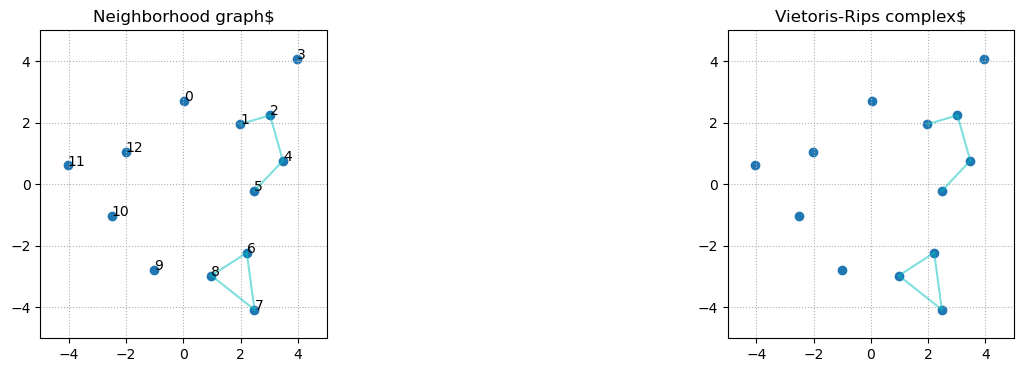

Graph with 13 nodes and 6 edges
13 2


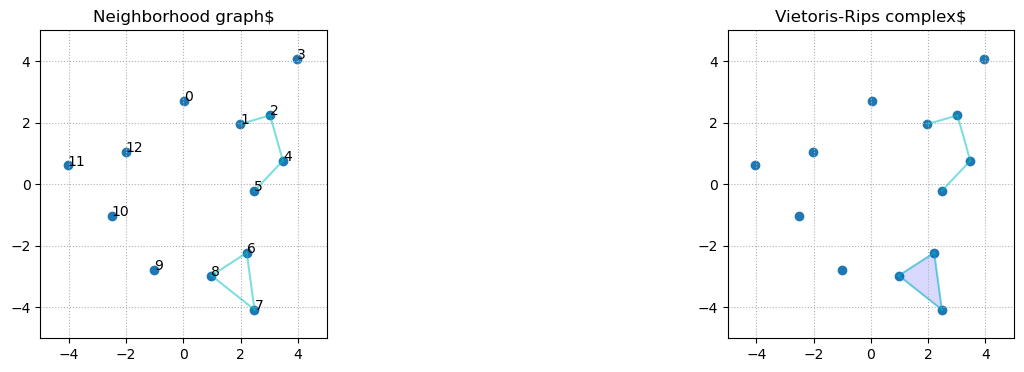

Graph with 13 nodes and 8 edges
13 2


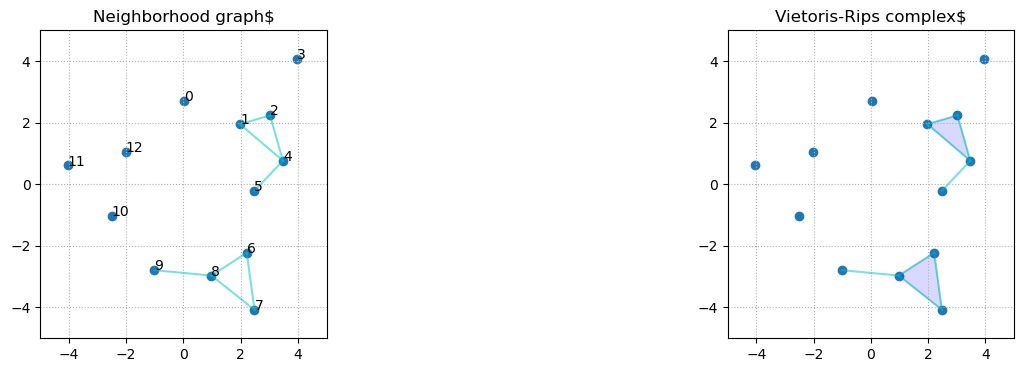

Graph with 13 nodes and 9 edges
13 2


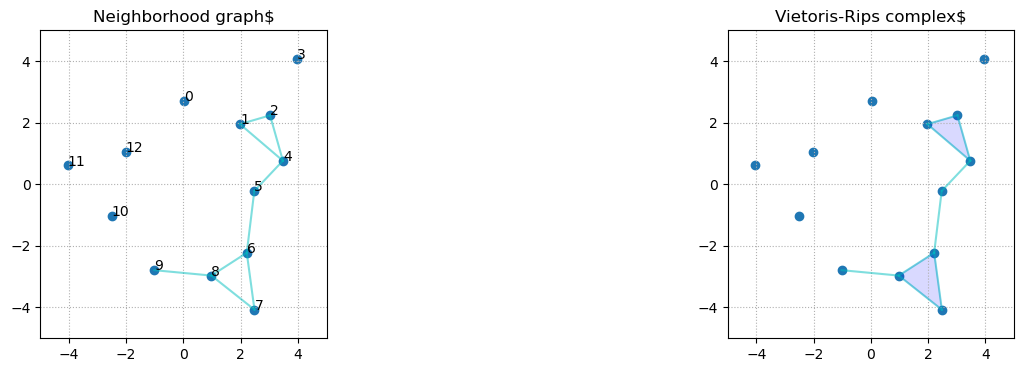

Graph with 13 nodes and 10 edges
13 2


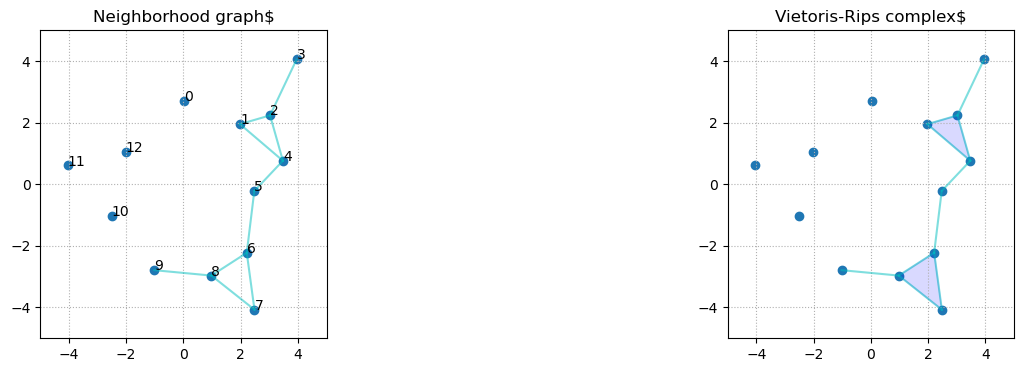

Graph with 13 nodes and 11 edges
13 2


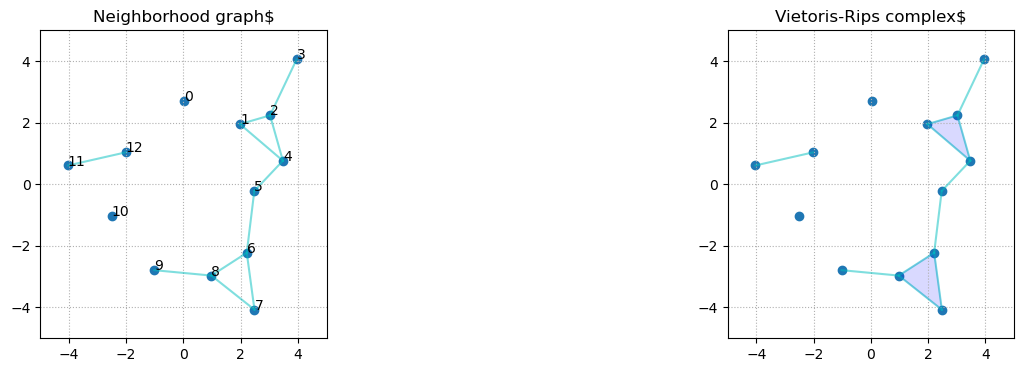

Graph with 13 nodes and 12 edges
13 2


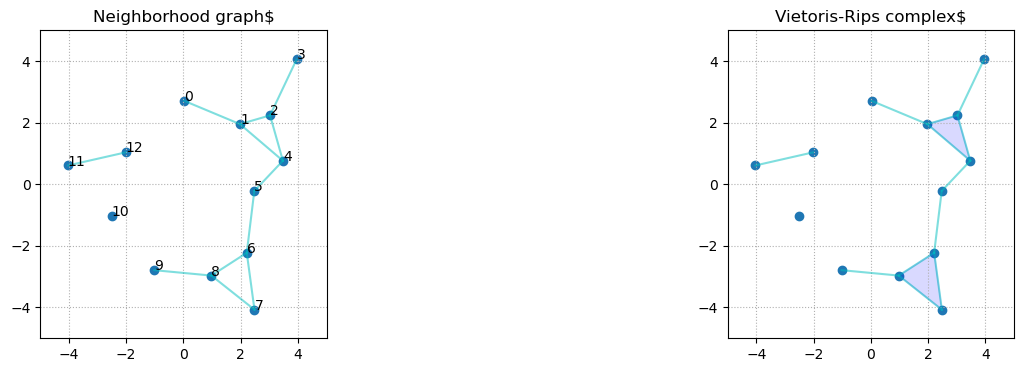

Graph with 13 nodes and 13 edges
13 2


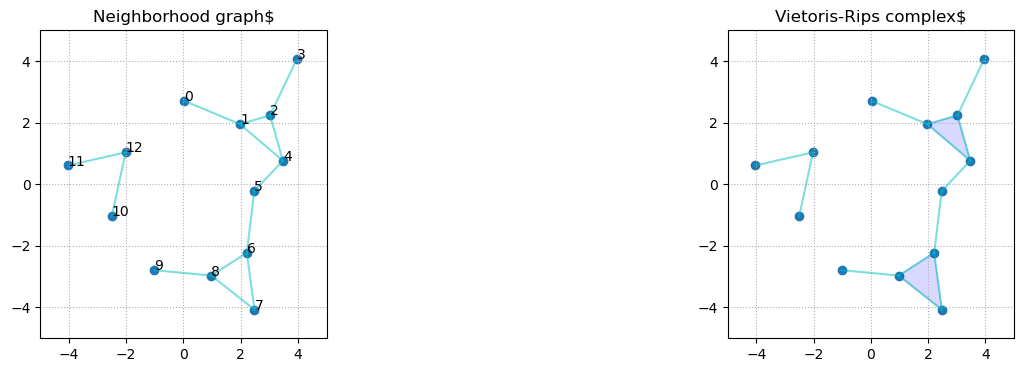

Graph with 13 nodes and 14 edges
13 2


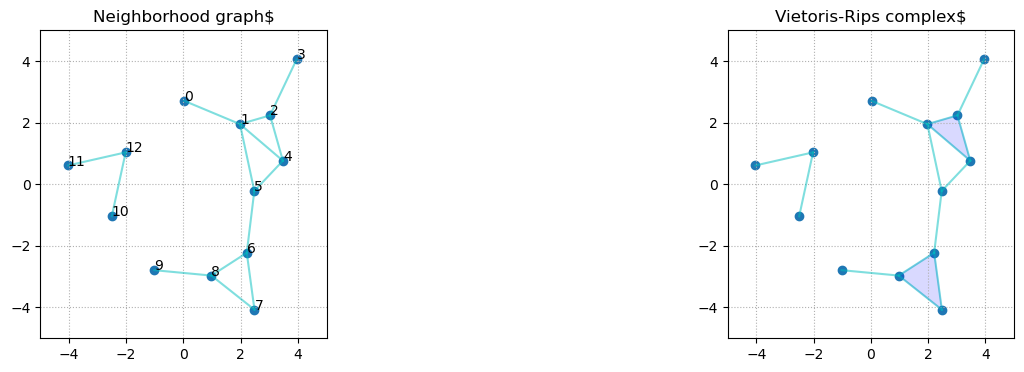

Graph with 13 nodes and 15 edges
13 2


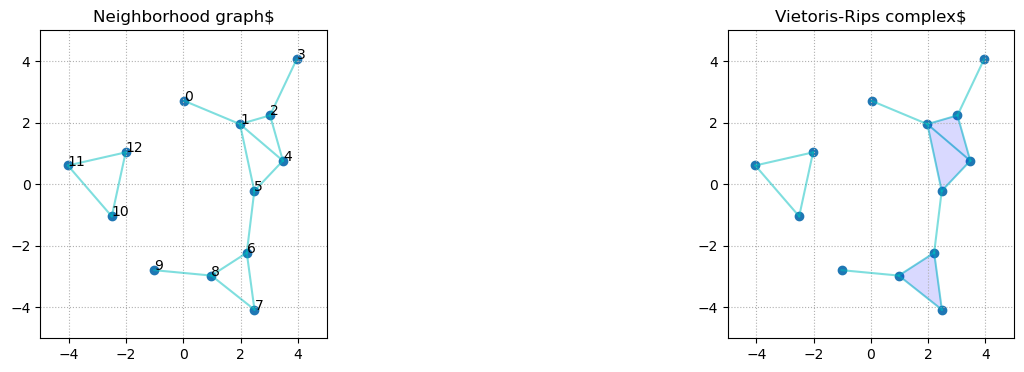

Graph with 13 nodes and 15 edges
13 2


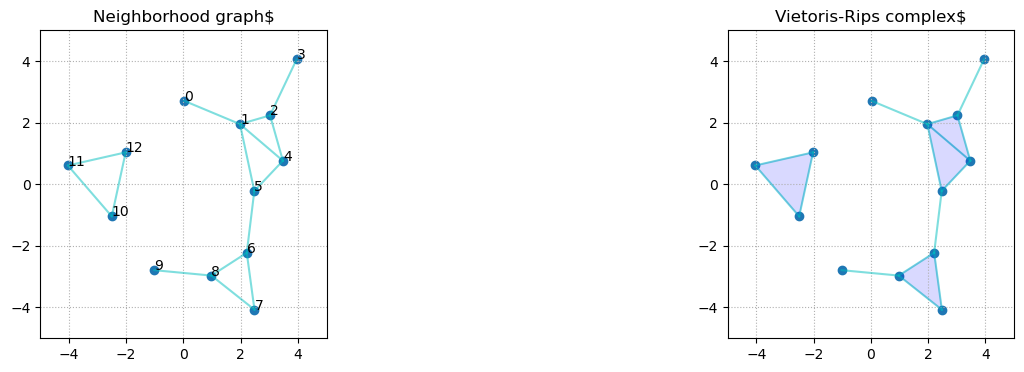

Graph with 13 nodes and 17 edges
13 2


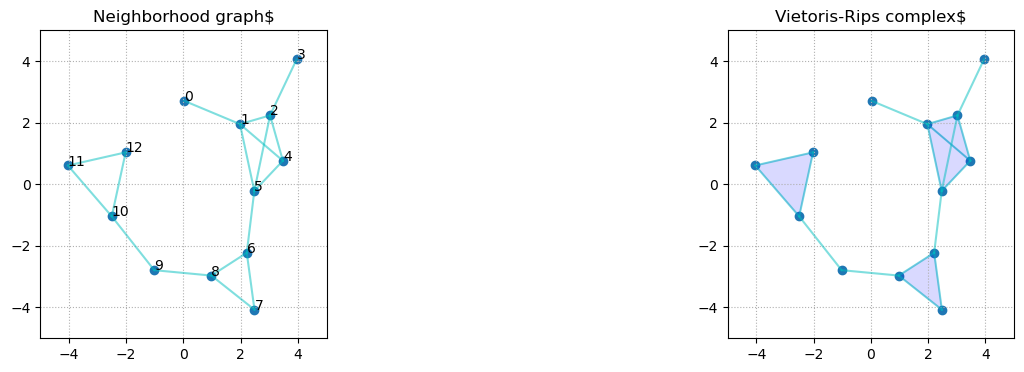

Graph with 13 nodes and 17 edges
13 2


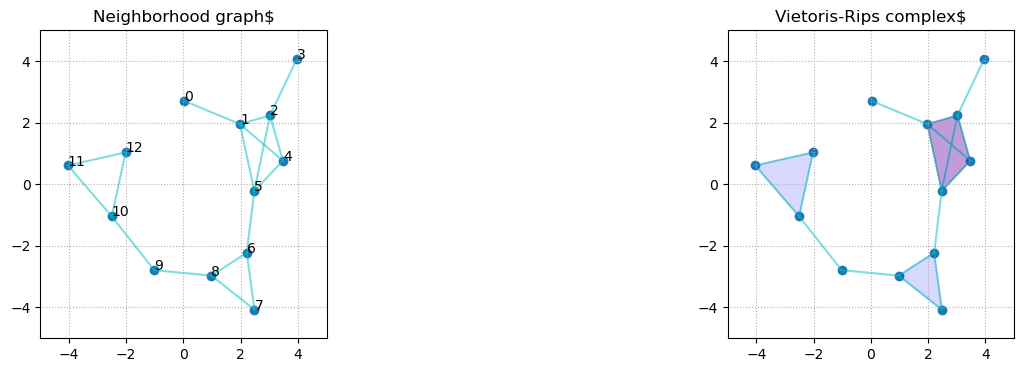

Graph with 13 nodes and 19 edges
13 2


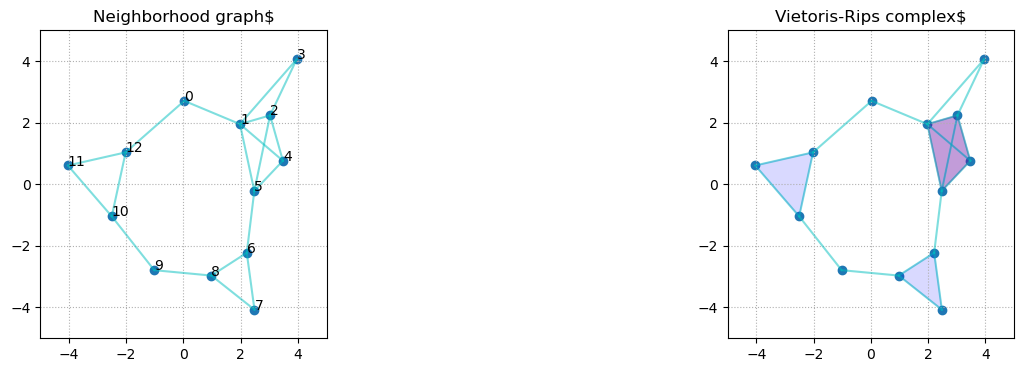

Graph with 13 nodes and 19 edges
13 2


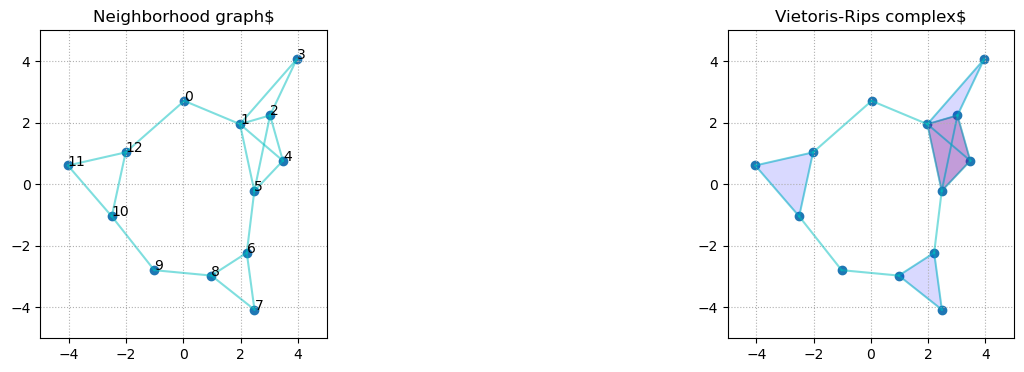

Graph with 13 nodes and 21 edges
13 2


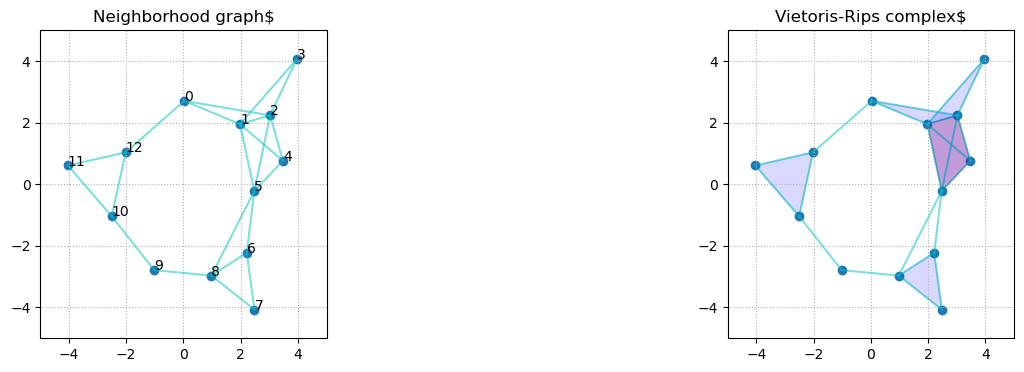

Graph with 13 nodes and 22 edges
13 2


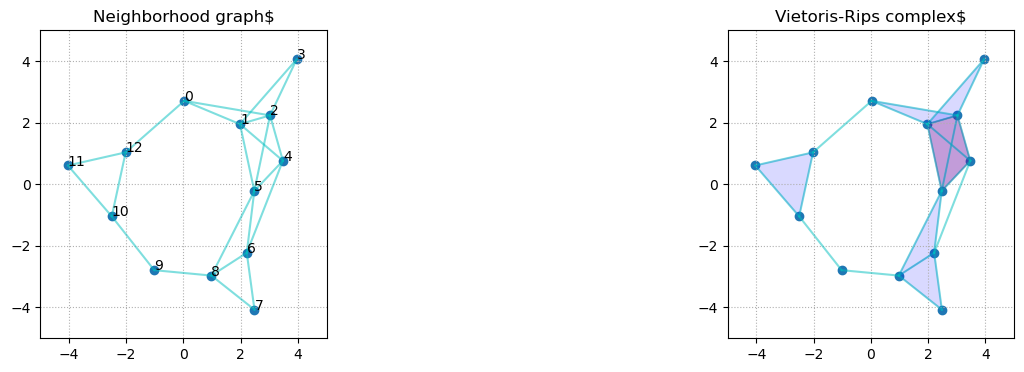

Graph with 13 nodes and 23 edges
13 2


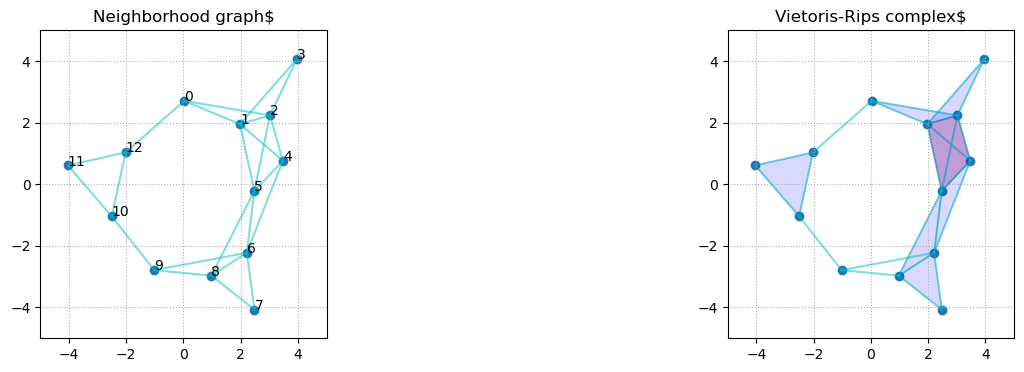

Graph with 13 nodes and 24 edges
13 2


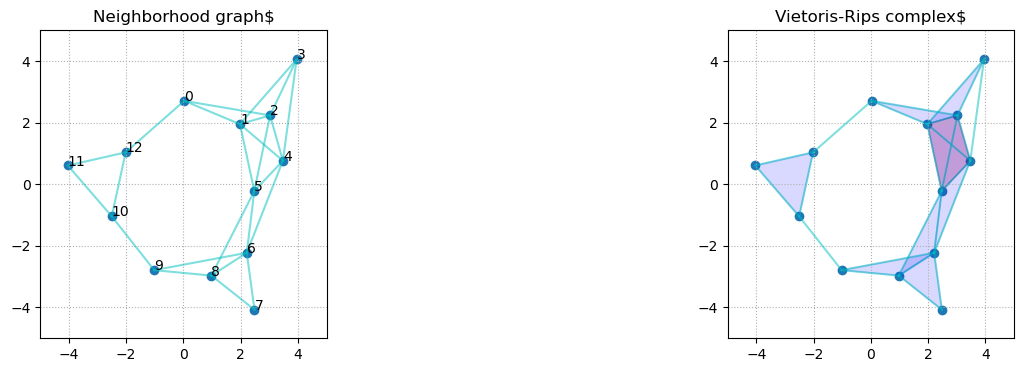

Graph with 13 nodes and 24 edges
13 2


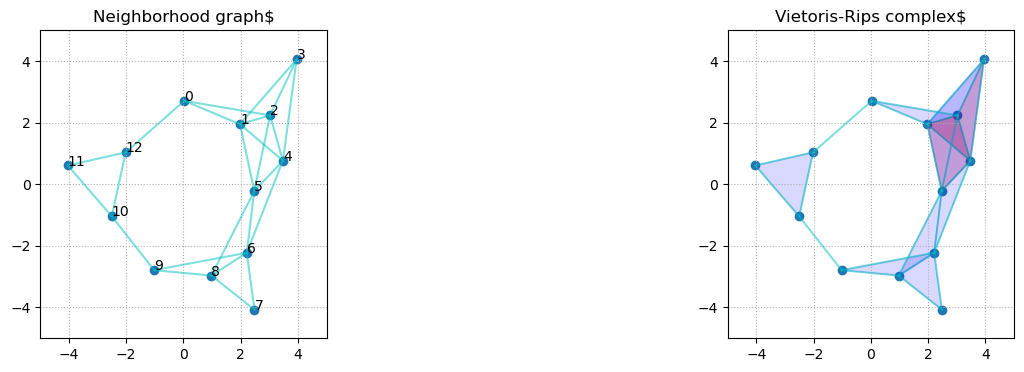

Graph with 13 nodes and 26 edges
13 2


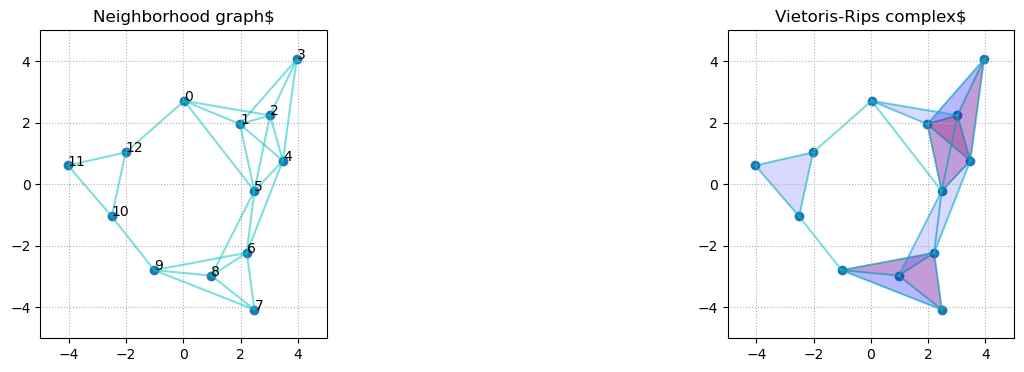

Graph with 13 nodes and 27 edges
13 2


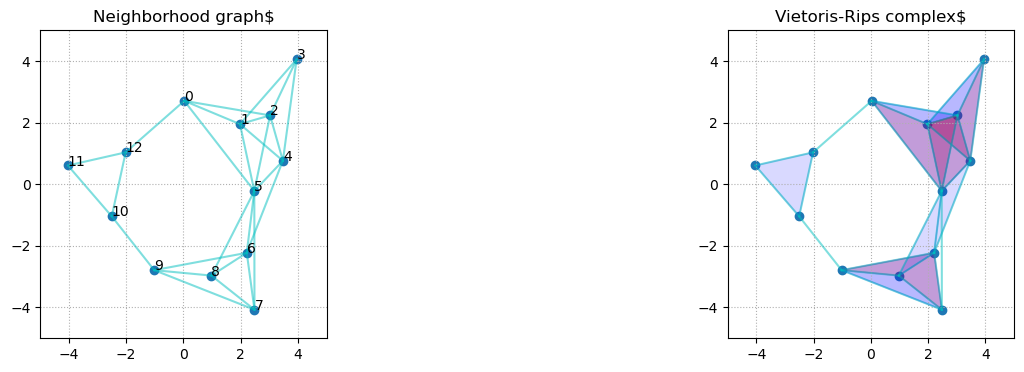

Graph with 13 nodes and 28 edges
13 2


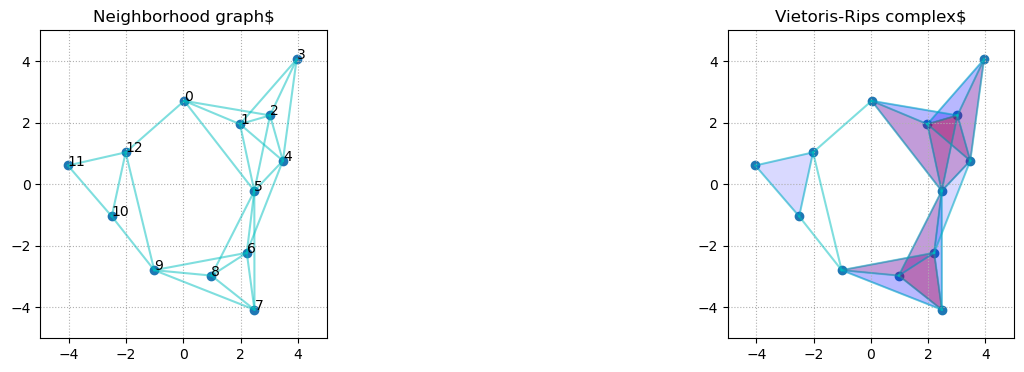

Graph with 13 nodes and 28 edges
13 2


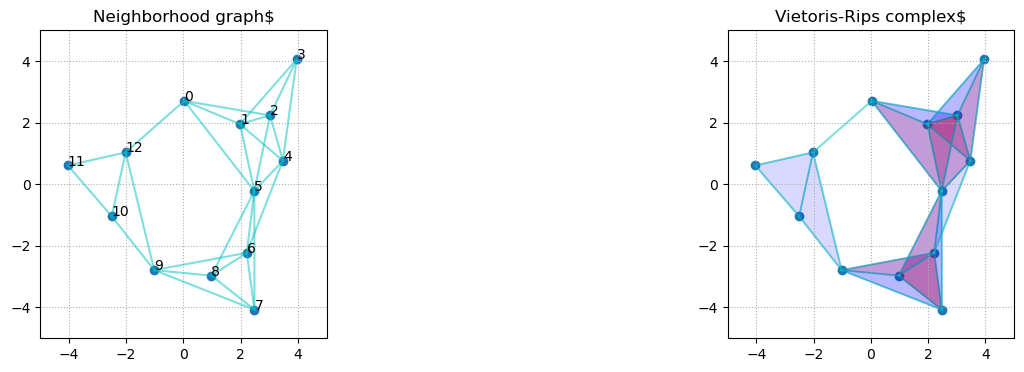

Graph with 13 nodes and 30 edges
13 2


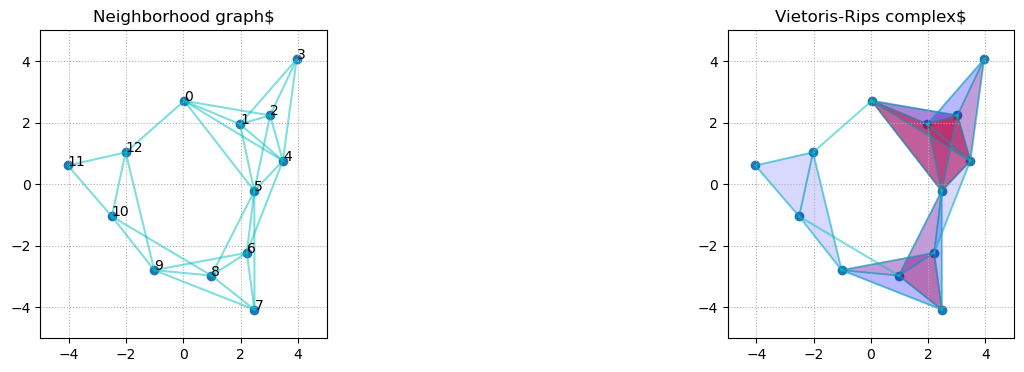

Graph with 13 nodes and 31 edges
13 2


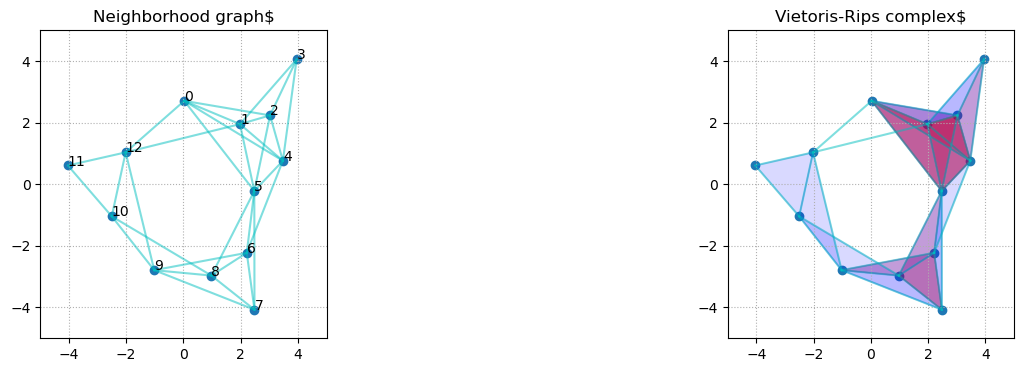

Graph with 13 nodes and 31 edges
13 2


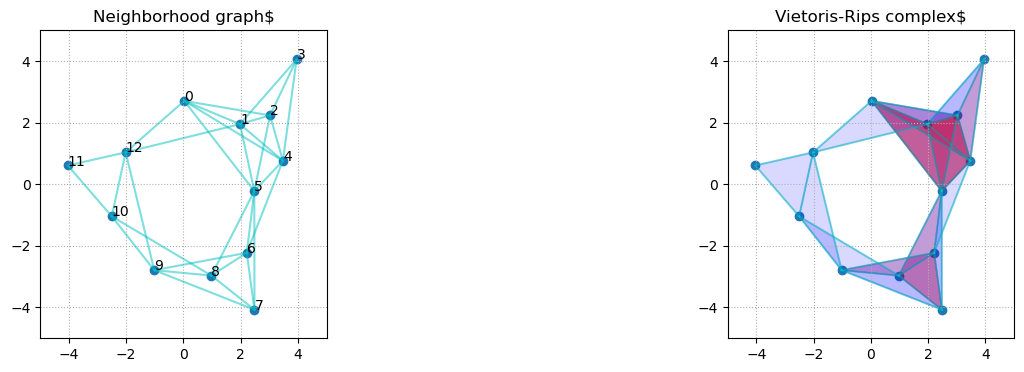

Graph with 13 nodes and 33 edges
13 2


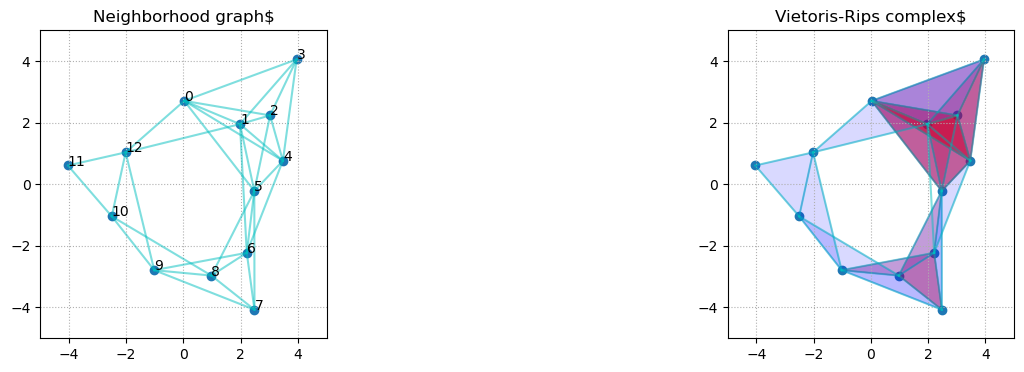

In [ ]:
__K = 0

for epsilon in epsilons:
    _A = radius_neighbors_graph(X, epsilon, mode='distance', include_self=False).toarray() #.astype(int)

    _G = nx.from_numpy_array(_A)

    _M = _A.copy()
    np.fill_diagonal(_M, 1)

    print(_G)
    _A = _A.astype(np.float32)
    # __K = gf.get_VR_from_dist_matrix(_A, 4)
    __K = gf.get_VR_from_coord_matrix(X, epsilon, 4)
    _K =  __K.as_list()
    # print("Core graph V: {}".format(nx.nodes(_CG)))
    # print("Core graph E: {}".format(nx.edges(_CG)))
    # print("\r\nCore cmplx V: {}".format(_CK[0]))
    # if len(_CK) > 1:
    #     print("Core cmplx E: {}".format(_CK[1]))
    # else:
    #     print("Core cmplx E: []")
    # print("_K", _K)
    plot_core(_G, _K)
    # type(__K)
# type(__K)

Graph with 13 nodes and 1 edges
78
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
286
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
715
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr


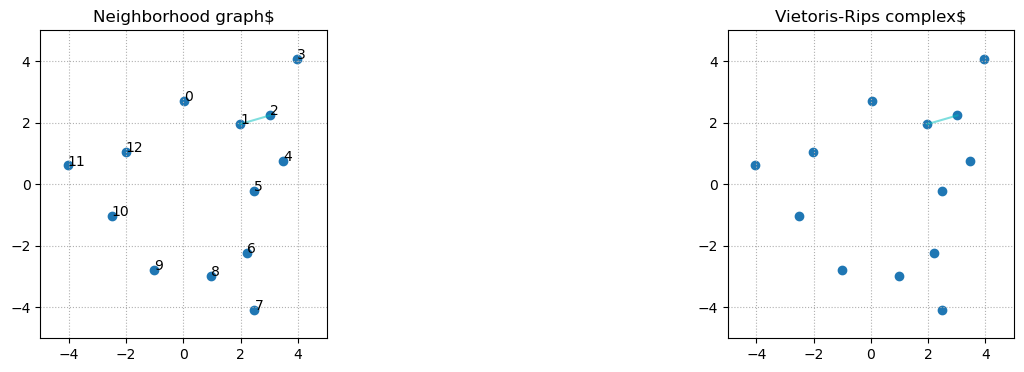

Graph with 13 nodes and 1 edges
78
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
286
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
715
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr


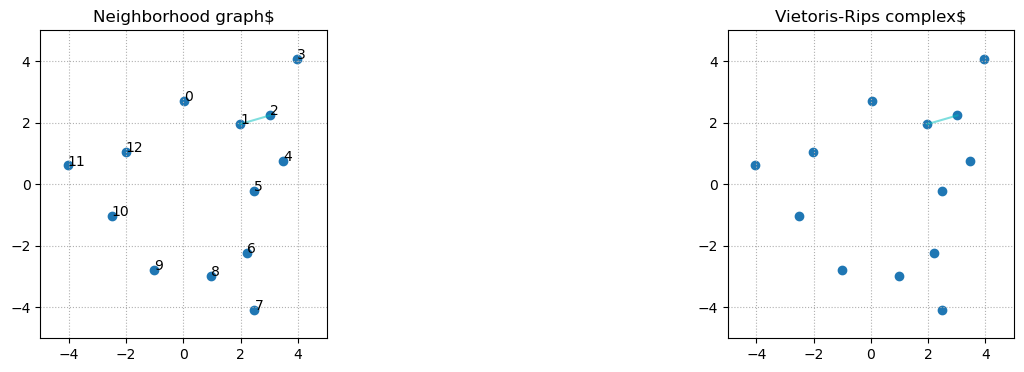

Graph with 13 nodes and 3 edges
78
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
286
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
715
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr


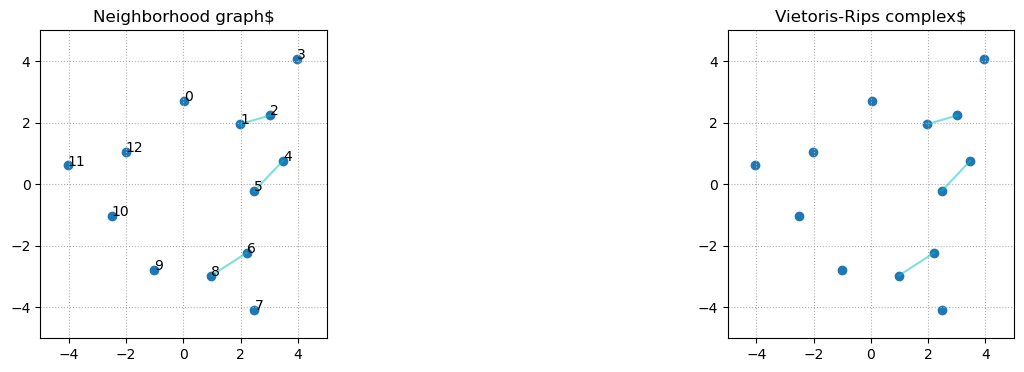

Graph with 13 nodes and 4 edges
78
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
286
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
715
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr


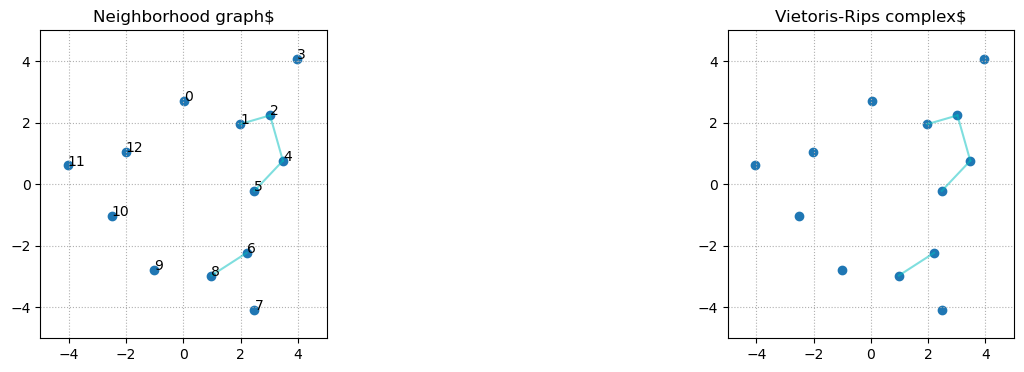

Graph with 13 nodes and 4 edges
78
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
286
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
715
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr


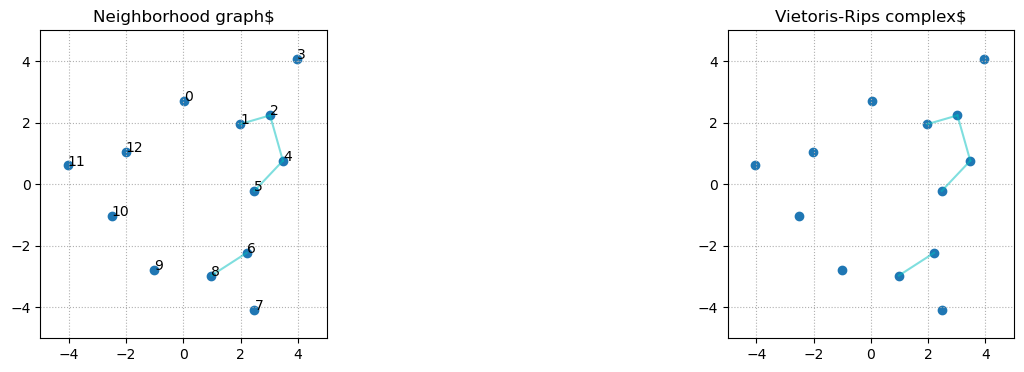

Graph with 13 nodes and 6 edges
78
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
286
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
715
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr


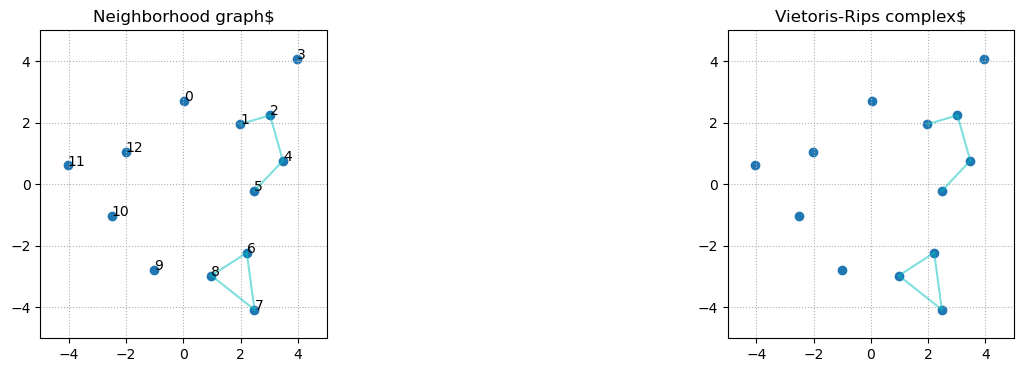

Graph with 13 nodes and 6 edges
78
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
286
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
715
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr


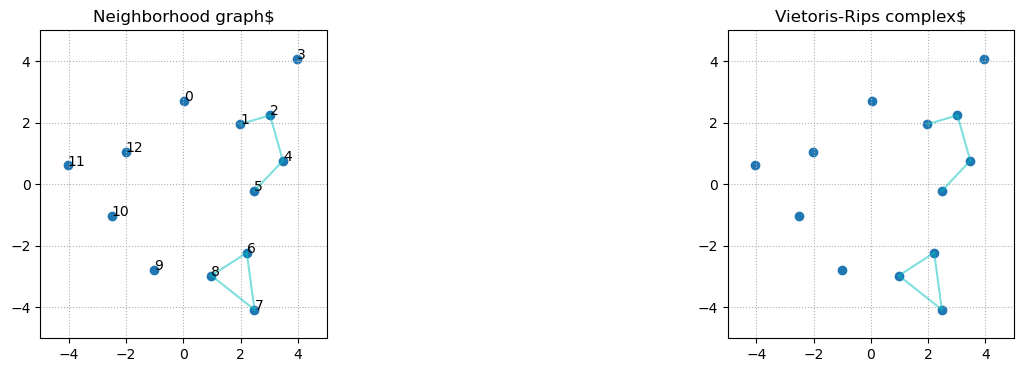

Graph with 13 nodes and 8 edges
78
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
286
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
715
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr


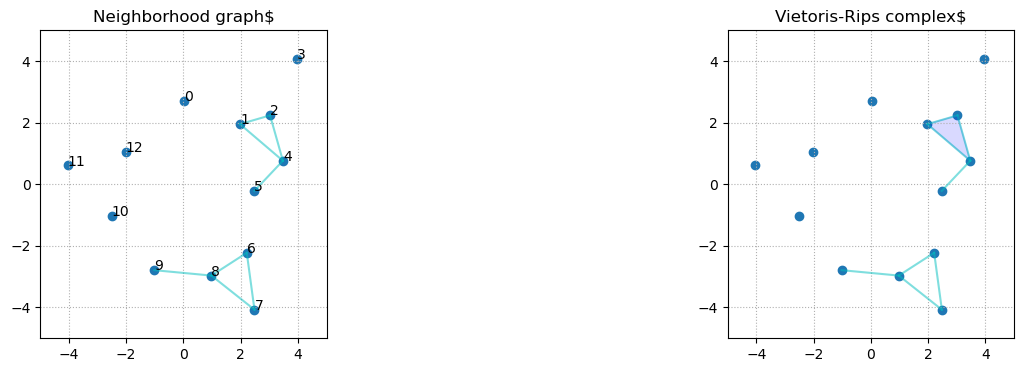

Graph with 13 nodes and 9 edges
78
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
286
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
715
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr


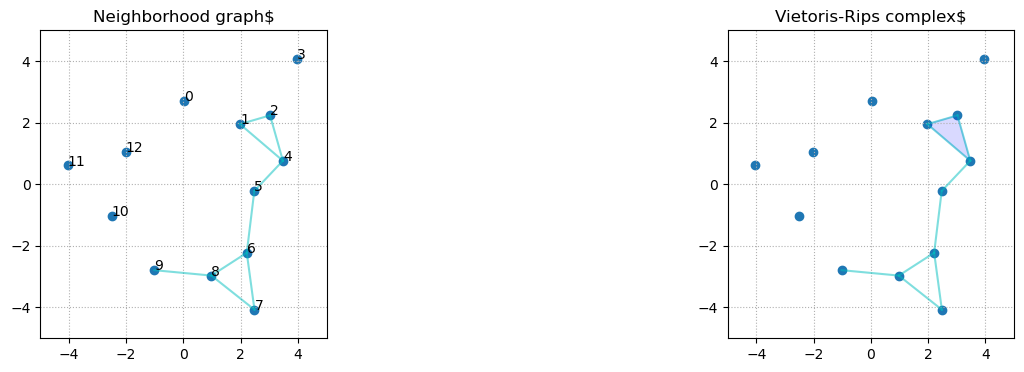

Graph with 13 nodes and 10 edges
78
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
286
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
715
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr


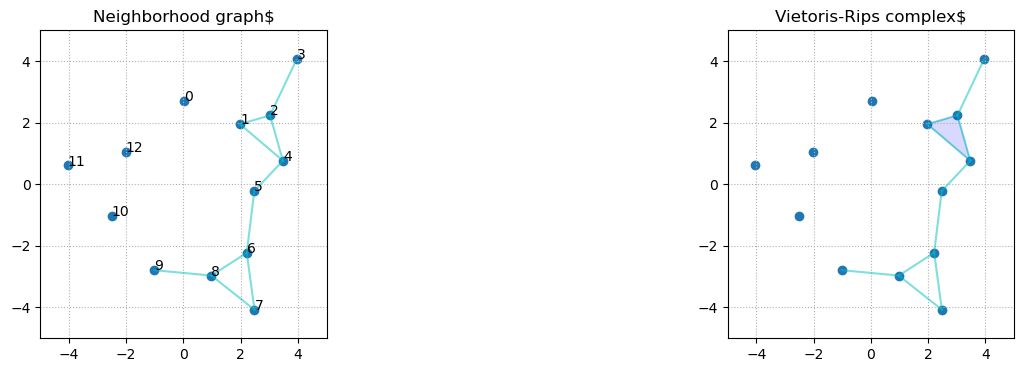

Graph with 13 nodes and 11 edges
78
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
286
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
715
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr


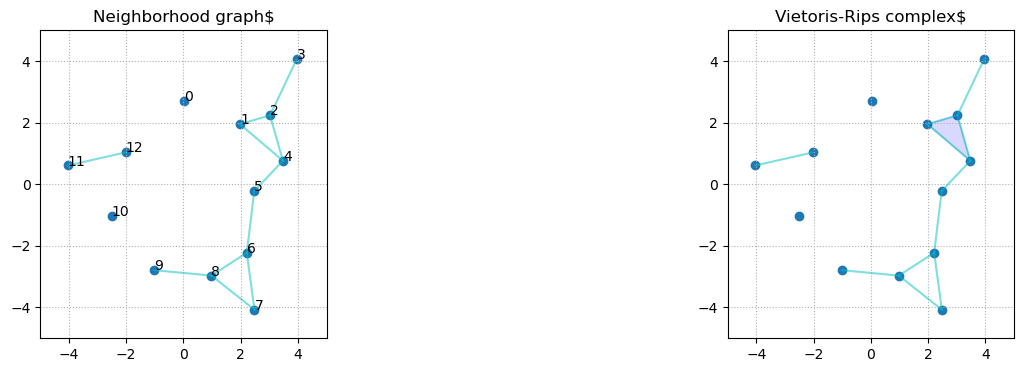

Graph with 13 nodes and 12 edges
78
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
286
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
715
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr


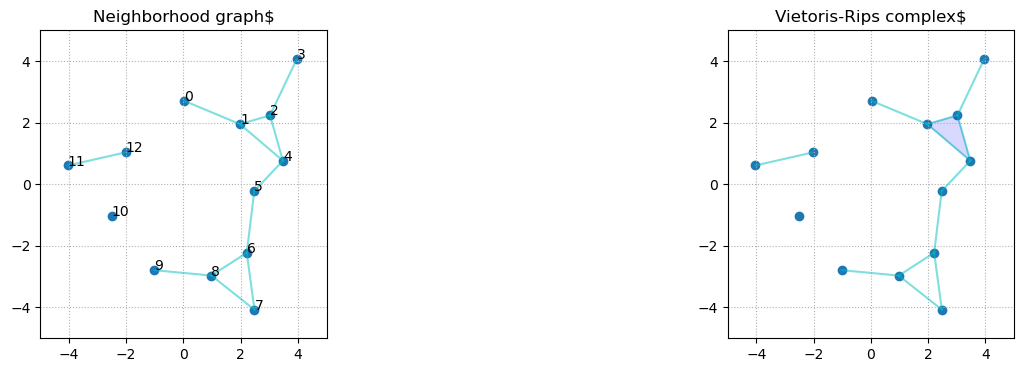

Graph with 13 nodes and 13 edges
78
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
286
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
715
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr


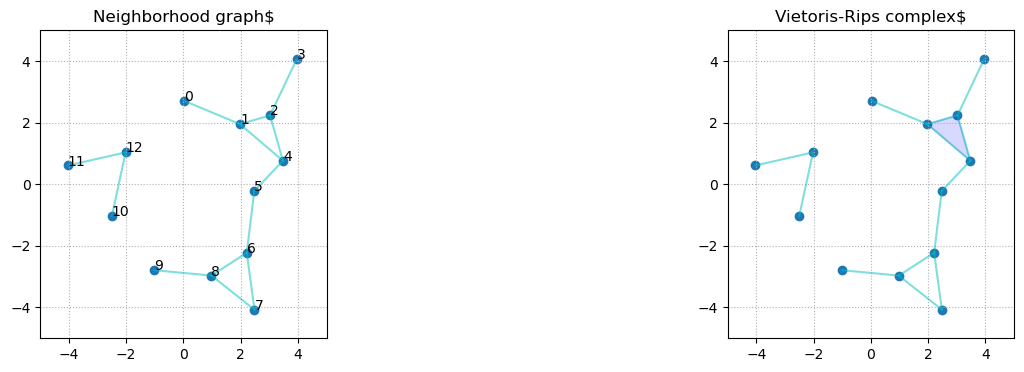

Graph with 13 nodes and 14 edges
78
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
286
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
715
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr


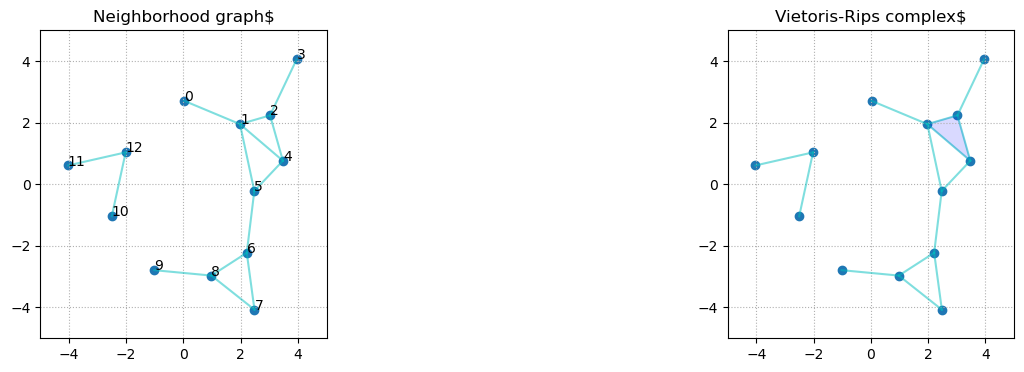

Graph with 13 nodes and 15 edges
78
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
286
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
715
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr


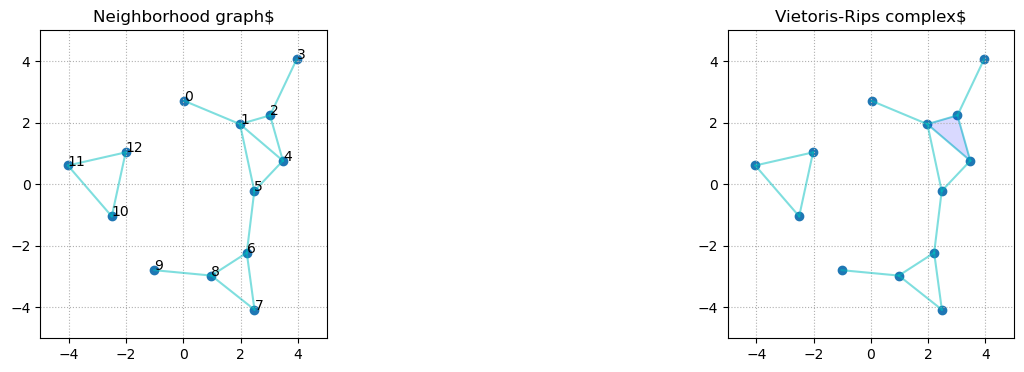

Graph with 13 nodes and 15 edges
78
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
286
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
715
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr


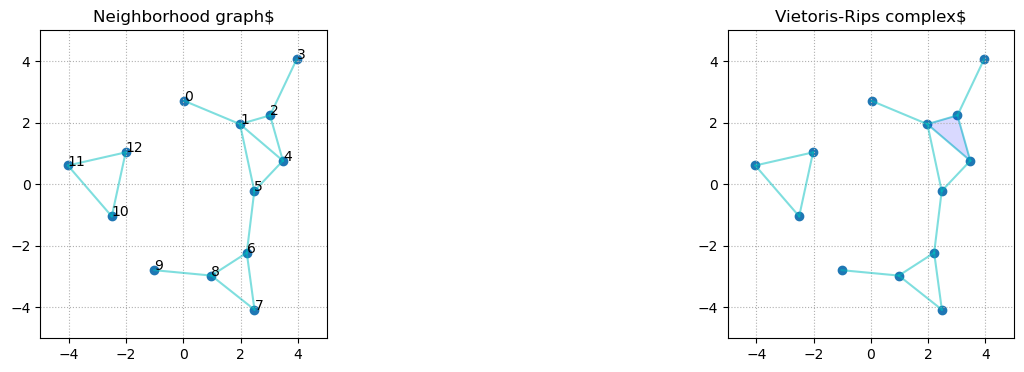

Graph with 13 nodes and 17 edges
78
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
286
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
715
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr


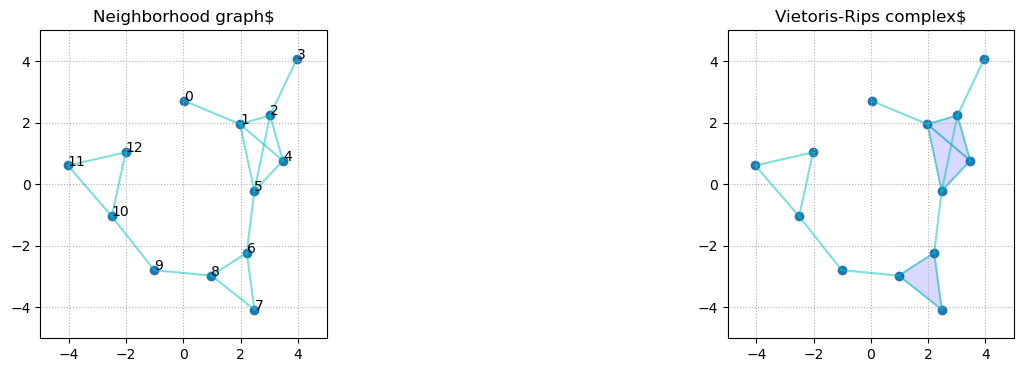

Graph with 13 nodes and 17 edges
78
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
286
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
715
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr


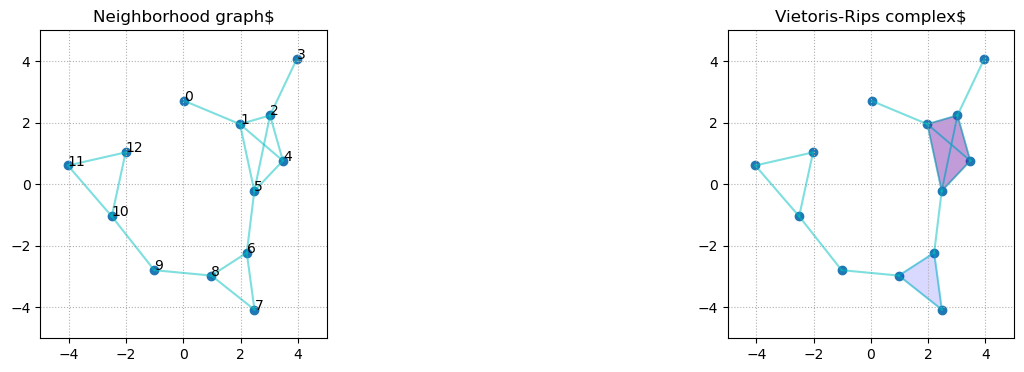

Graph with 13 nodes and 19 edges
78
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
286
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
715
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr


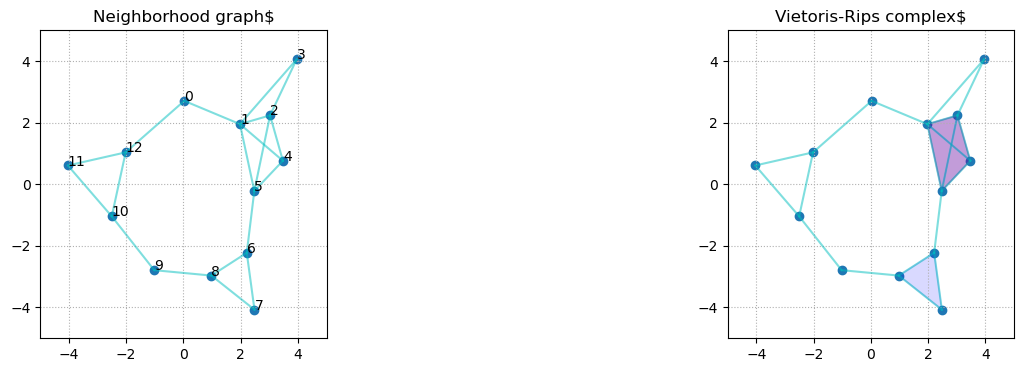

Graph with 13 nodes and 19 edges
78
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
286
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
715
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr


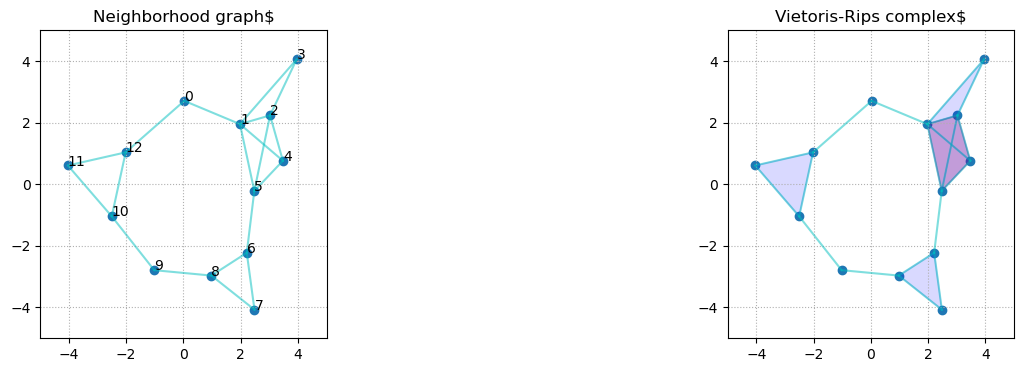

Graph with 13 nodes and 21 edges
78
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
286
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
715
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr


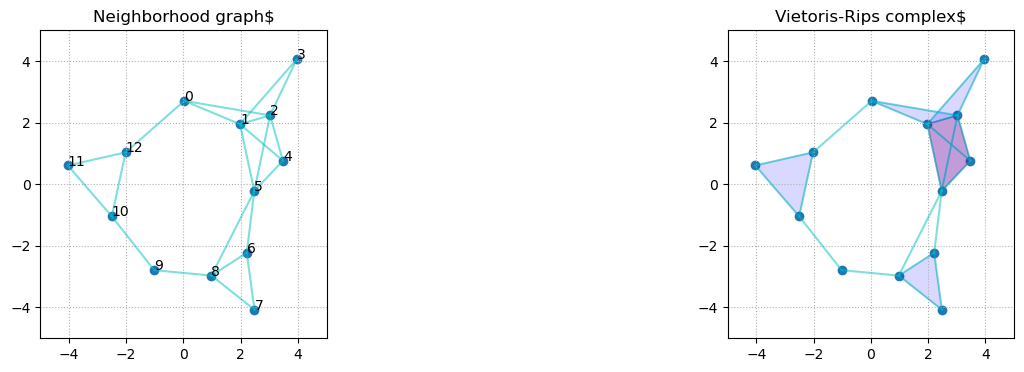

Graph with 13 nodes and 22 edges
78
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
286
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
715
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr


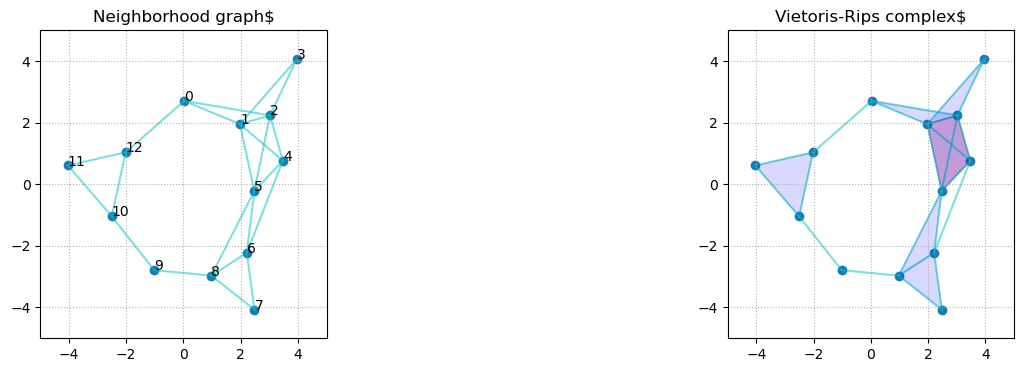

Graph with 13 nodes and 23 edges
78
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
286
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
715
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr


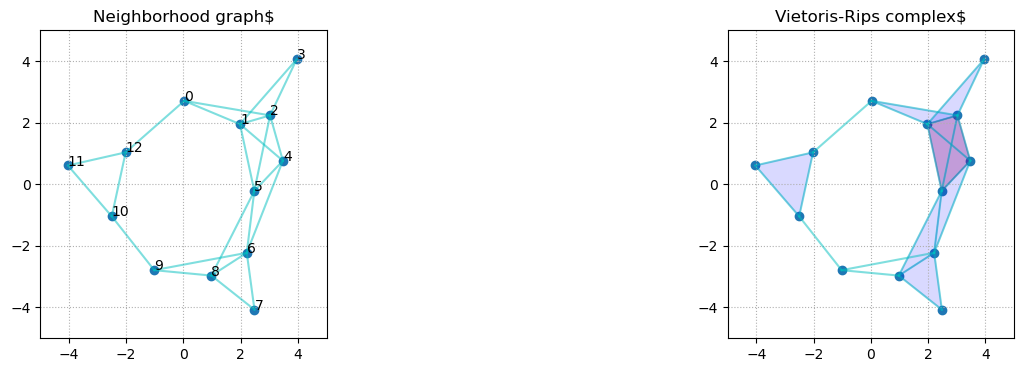

Graph with 13 nodes and 24 edges
78
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
286
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
715
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr


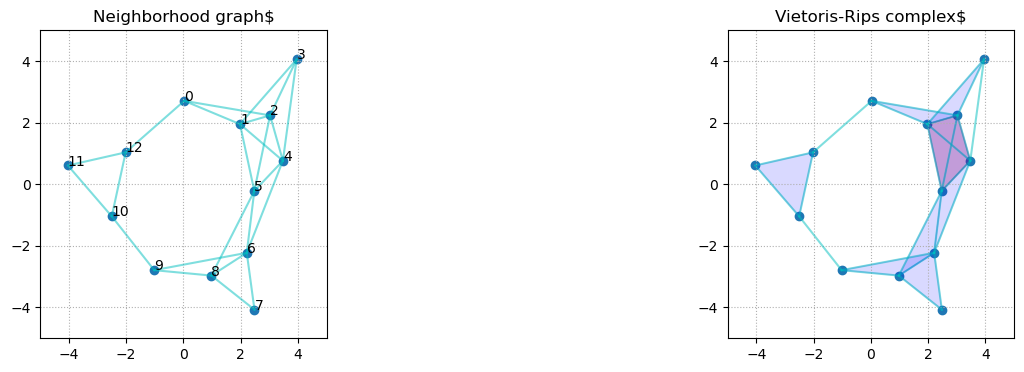

Graph with 13 nodes and 24 edges
78
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
286
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
715
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr


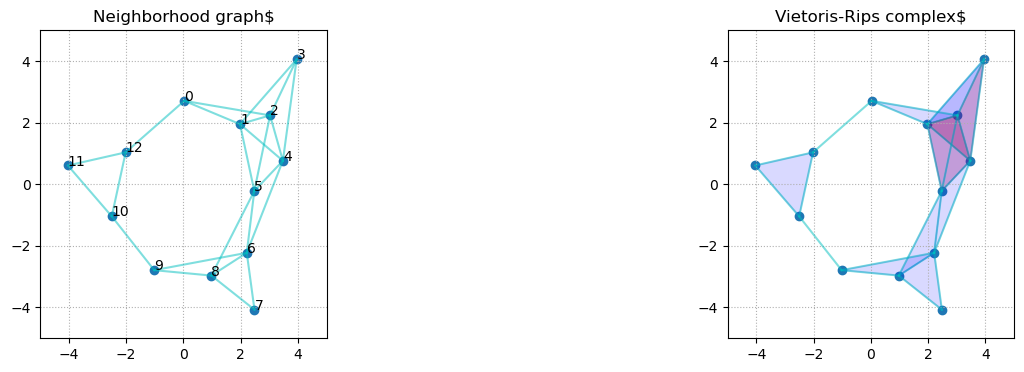

Graph with 13 nodes and 26 edges
78
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
286
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
715
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr


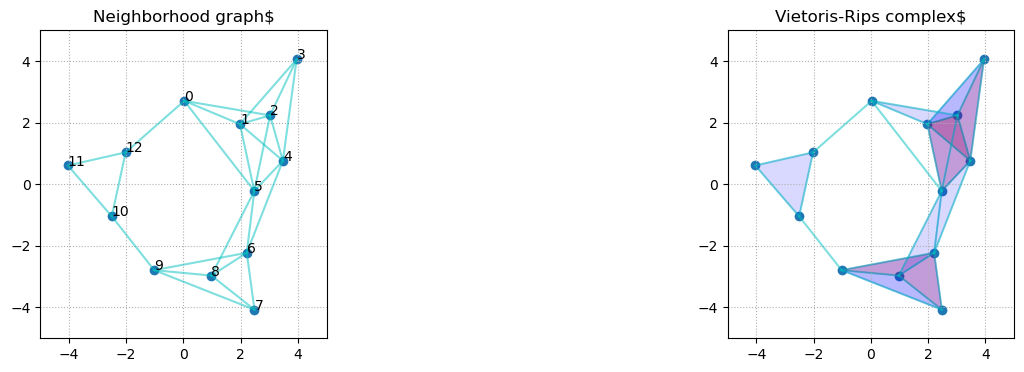

Graph with 13 nodes and 27 edges
78
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
286
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
715
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr


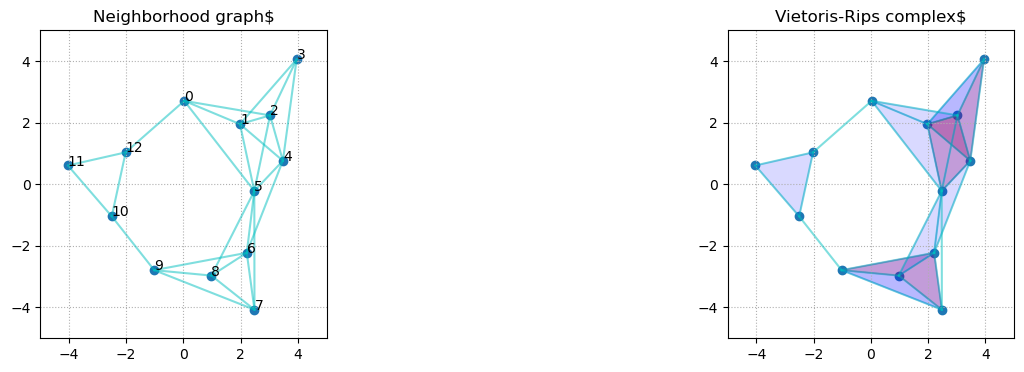

Graph with 13 nodes and 28 edges
78
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
286
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
715
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr


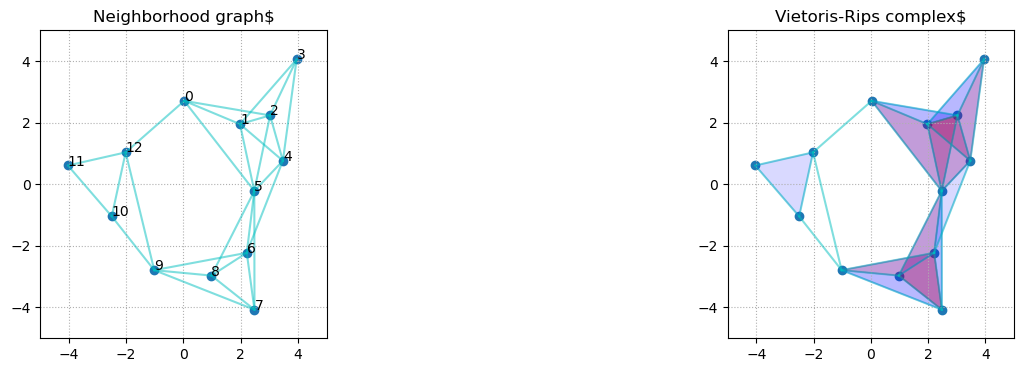

Graph with 13 nodes and 28 edges
78
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
286
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
715
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr


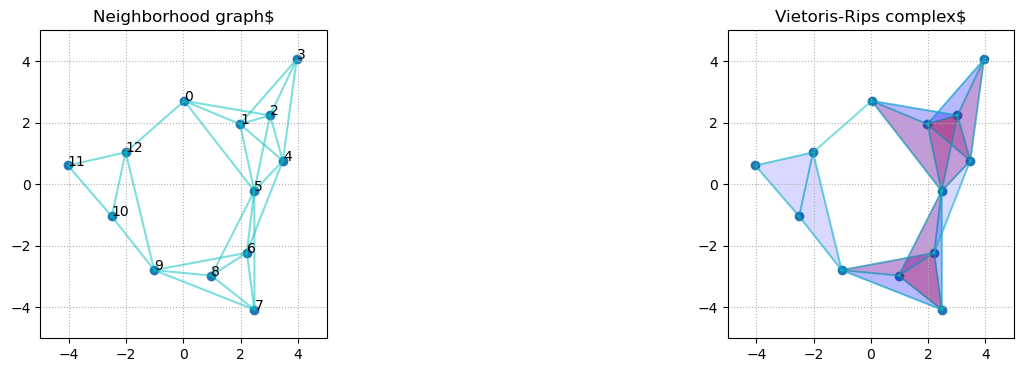

Graph with 13 nodes and 30 edges
78
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
286
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
715
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr


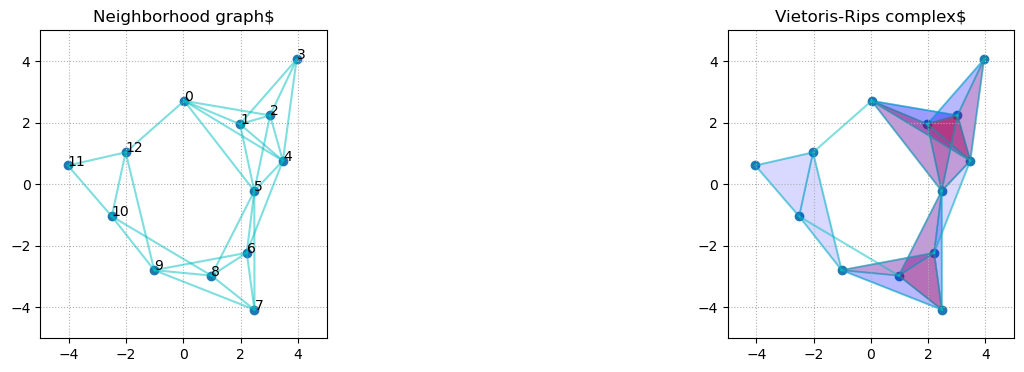

Graph with 13 nodes and 31 edges
78
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
286
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
715
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr


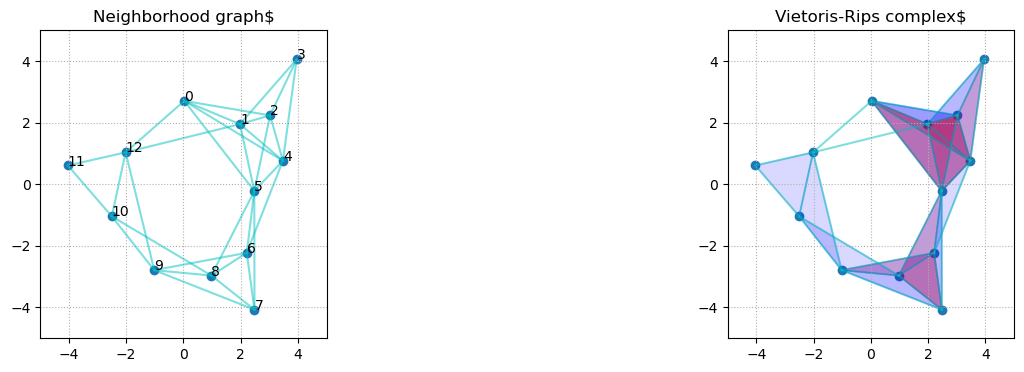

Graph with 13 nodes and 31 edges
78
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
286
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
715
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr


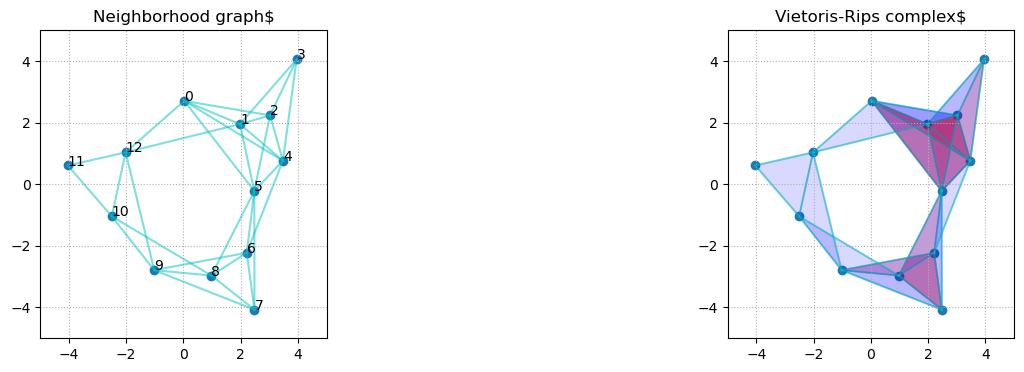

Graph with 13 nodes and 33 edges
78
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
286
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
715
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr
start thr


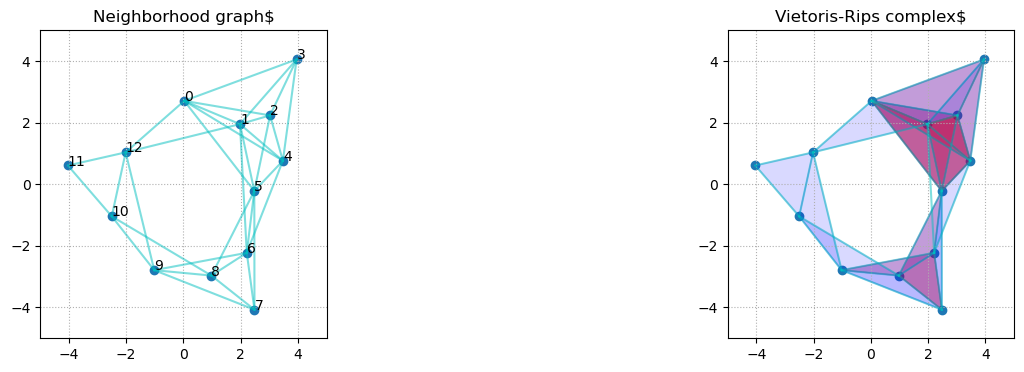

In [ ]:
__K = 0

for epsilon in epsilons:
    _A = radius_neighbors_graph(X, epsilon, mode='distance', include_self=False).toarray() #.astype(int)

    _G = nx.from_numpy_array(_A)

    _M = _A.copy()
    np.fill_diagonal(_M, 1)

    print(_G)
    _A = _A.astype(np.float32)
    # __K = gf.get_VR_from_dist_matrix(_A, 4)
    # __K = gf.get_VR_from_coord_matrix(X, epsilon, 4)
    __K = gf.get_Lp_from_coord_matrix(X, epsilon, 2, 4)
    _K =  __K.as_list()
    # print("Core graph V: {}".format(nx.nodes(_CG)))
    # print("Core graph E: {}".format(nx.edges(_CG)))
    # print("\r\nCore cmplx V: {}".format(_CK[0]))
    # if len(_CK) > 1:
    #     print("Core cmplx E: {}".format(_CK[1]))
    # else:
    #     print("Core cmplx E: []")
    # print("_K", _K)
    plot_core(_G, _K)
    # type(__K)
# type(__K)